In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.optimize import curve_fit

# Montar el drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Carga de imágenes
# Número de imágenes:

IMAGENES = np.zeros((37, 5792, 4344))
for ii in range(37):
    foto = '/content/drive/MyDrive/Mediciones Cuestionario 5/Copia de' + str(10*ii).zfill(3) + '.jpg'
    IMAGENES[ii] = cv2.imread(foto, cv2.IMREAD_GRAYSCALE)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Datos inválidos en posición (50, 0).
Datos inválidos en posición (50, 1).
Datos inválidos en posición (50, 2).
Datos inválidos en posición (50, 3).
Datos inválidos en posición (50, 4).
Datos inválidos en posición (50, 5).
Datos inválidos en posición (50, 6).
Datos inválidos en posición (50, 7).
Datos inválidos en posición (50, 8).
Datos inválidos en posición (50, 9).
Datos inválidos en posición (50, 10).
Datos inválidos en posición (50, 11).
Datos inválidos en posición (50, 12).
Datos inválidos en posición (50, 13).
Datos inválidos en posición (50, 14).
Datos inválidos en posición (50, 15).
Datos inválidos en posición (50, 16).
Datos inválidos en posición (50, 17).
Datos inválidos en posición (50, 18).
Datos inválidos en posición (50, 19).
Datos inválidos en posición (50, 20).
Datos inválidos en posición (50, 21).
Datos inválidos en posición (50, 22).
Datos inválidos en posición (50, 23).
Datos inválidos en posición (50

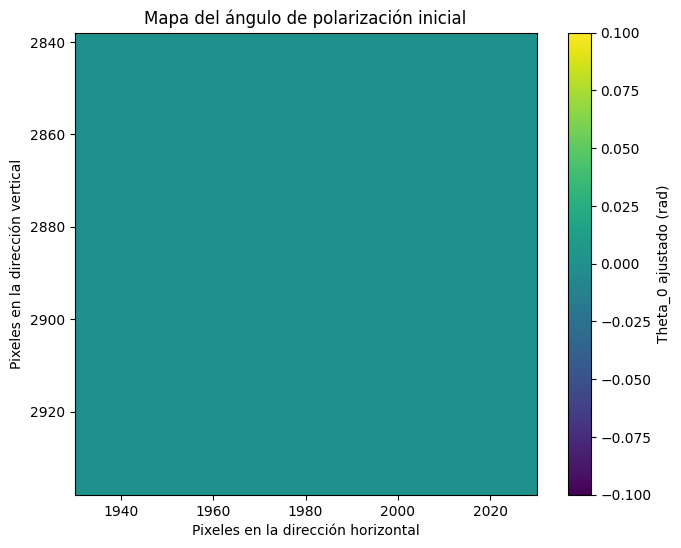

In [8]:
# Definir la región de interés
a, b = 2838, 2938  # Rango vertical (ejemplo)
c, d = 1930, 2030  # Rango horizontal (ejemplo)

# Extraer sub-bloque (multipuntos)
multipuntos = IMAGENES[:, a:b, c:d]

# Definir el vector de ángulos en radianes
ejex = np.arange(0.0, 2*np.pi + np.pi/180*5, np.pi/180*5)

# Función de Malus
def malus(theta, I0, theta0):
    return I0 * (np.cos(theta - theta0))**2

# Matriz para almacenar los ángulos ajustados
theta_map = np.zeros((b - a, d - c))

# Ajuste en cada punto de la subregión
for i in range(b - a):
    for j in range(d - c):
        # Intensidades para la posición (i, j) en la subregión
        intensidades = multipuntos[:, i, j]

        # Verificar si hay NaN o inf en los datos
        if not np.isfinite(intensidades).all():
            print(f"Datos inválidos en posición ({i}, {j}).")
            continue  # Omitir este punto si hay valores no válidos

        # Valores iniciales para el ajuste
        p0 = [max(intensidades), 0]

        try:
            # Realizar el ajuste
            popt, pcov = curve_fit(malus, ejex, intensidades, p0=p0)
            I0_fit, theta0_fit = popt

            # Guardar el ángulo ajustado en el mapa
            theta_map[i, j] = theta0_fit
        except RuntimeError as e:
            print(f"No se pudo ajustar en posición ({i}, {j}): {e}")
            theta_map[i, j] = np.nan  # O marcar como NaN si el ajuste falla

# Graficar el mapa de ángulos
plt.figure(figsize=(8,6))
im = plt.imshow(theta_map, extent=[c, d, b, a], origin='upper')
plt.colorbar(im, label='Theta_0 ajustado (rad)')
plt.xlabel('Pixeles en la dirección horizontal')
plt.ylabel('Pixeles en la dirección vertical')
plt.title('Mapa del ángulo de polarización inicial')
plt.show()